# Customer Purchase Prediction & Effect of Micro-Numerosity

In [2]:
# Step 1 : import library
import pandas as pd

In [3]:
# Step 2 : import data
purchase = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Customer%20Purchase.csv')

In [6]:
purchase.head()

,Customer ID,Age,Gender,Education,Review,Purchased
0,1021,30,Female,School,Average,No
1,1022,68,Female,UG,Poor,No
2,1023,70,Female,PG,Good,No
3,1024,72,Female,PG,Good,No
4,1025,16,Female,UG,Average,No


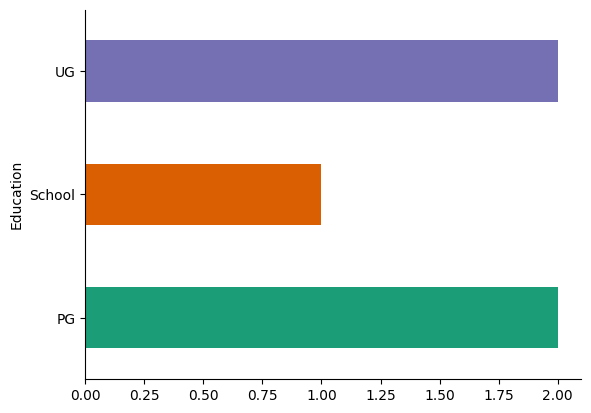

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Education').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  50 non-null     int64 
 1   Age          50 non-null     int64 
 2   Gender       50 non-null     object
 3   Education    50 non-null     object
 4   Review       50 non-null     object
 5   Purchased    50 non-null     object
dtypes: int64(2), object(4)
memory usage: 2.5+ KB


In [10]:
purchase.describe()

,Customer ID,Age
count,50.00000,50.000000
mean,1045.50000,54.160000
std,14.57738,25.658161
min,1021.00000,15.000000
25%,1033.25000,30.250000
50%,1045.50000,57.000000
75%,1057.75000,74.000000
max,1070.00000,98.000000


In [9]:
# Step 3 : define target (y) and features (X)
purchase.columns

Index(['Customer ID', 'Age', 'Gender', 'Education', 'Review', 'Purchased'], dtype='object')

In [11]:
y = purchase['Purchased']
X = purchase.drop(['Purchased','Customer ID'],axis=1)

In [12]:
# encoding categorical variable
X.replace({'Review':{'Poor':0,'Average':1,'Good':2}},inplace=True)
X.replace({'Education':{'School':0,'UG':1,'PG':2}},inplace=True)
X.replace({'Gender':{'Male': 0,'Female':1}},inplace=True)

In [13]:
# display first 5 rows
X.head()

,Age,Gender,Education,Review
0,30,1,0,1
1,68,1,1,0
2,70,1,2,2
3,72,1,2,2
4,16,1,1,1


In [14]:
# Step 4 : train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=2529)

In [15]:
# check shape of train and test sample
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40, 4), (10, 4), (40,), (10,))

In [16]:
# Step 5 : select model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [17]:
# Step 6 : train or fit model
model.fit(X_train,y_train)

RandomForestClassifier()

In [18]:
# Step 7 : predict model
y_pred = model.predict(X_test)
y_pred

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes'],
      dtype=object)

In [19]:
# Step 8 : model accuracy
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
confusion_matrix(y_test,y_pred)

array([[2, 1],
       [3, 4]])

In [20]:
accuracy_score(y_test,y_pred)

0.6

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.40      0.67      0.50         3
         Yes       0.80      0.57      0.67         7

    accuracy                           0.60        10
   macro avg       0.60      0.62      0.58        10
weighted avg       0.68      0.60      0.62        10

